In [119]:
import pandas as pd
import os

In [127]:
os.chdir('/Users/christopher/Desktop/Ironhack' )

In [128]:
df = pd.read_csv('sharks.csv', encoding = 'iso-8859-1')

In [129]:
df = df.fillna('NA')

In [130]:
df.Activity = df.Activity.str.lower()

In [76]:
activity_groups =\
        {'surfing' : ['surf'],\
        'boarding' : ['board'],\
        'diving' : ['dive','diving','spearfish'],\
        'snorkeling' : ['snorkel'],\
        'fishing' : ['fish'],\
        'swimming' : ['swim'],\
        'boating' : ['sail','row','boat','ship','yacht','kayak']}
    
for key,values in activity_groups.items():
    for value in values:
         df.loc[df.Activity.str.contains(value),'Activity'] = key
df.loc[(~df.Activity.isin(activity_groups))&(df.Activity!='NA'),'Activity'] = 'other'

In [124]:
activity_change_list= {'surfing':['surf','boarding'],\
                           'swimming':['swim', 'wading','standing'],\
                           'fishing':['fish','spearfishing'],\
                           'diving':['scuba diving','snorkeling']}

In [125]:
for key,values in activity_change_list.items():
    for value in values:
        df.loc[df.Activity.str.contains(value), 'Activity'] = key
df.loc[(~df.Activity.isin(activity_groups))&(df.Activity!='NA'),'Activity'] = 'other'

In [132]:
df.Activity.value_counts().head(20)

surfing            904
swimming           819
na                 527
fishing            414
spearfishing       321
bathing            153
wading             144
diving             123
standing            97
scuba diving        81
snorkeling          77
body boarding       57
body surfing        48
swimming            47
boogie boarding     44
pearl diving        32
treading water      32
kayaking            28
free diving         26
fell overboard      21
Name: Activity, dtype: int64

In [25]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [7]:
rows_to_drop = df[df.Year < 1980]

In [8]:
rows_to_drop

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2449,1989.07.27,27-Jul-89,1969,Invalid,BERMUDA,NaN,NaN,Scuba diving,Russian male,M,...,Shark involvement suspected but not confirmed,"LA Times, 7/28/1989",1989.07.27-SovietDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1989.07.27,1989.07.27,3545,NaN,NaN
2858,1979.12.21,21-Dec-79,1979,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Kenton-on-Sea,Swimming,Carl Shemaly,M,...,NaN,"M. Bowker; W. Pople, NSB",1979.12.21-Shemaly.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.12.21,1979.12.21,3135,NaN,NaN
2859,1979.12.00,05-Dec-79,1979,Invalid,PORTUGAL,Madeira Islands,"Sao Jorge, Madeira Island",Spearfishing,Fernando Branco de Abreu,M,...,White shark?,C. Moore. GSAF,1979.12.00-Madeira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.12.00,1979.12.00,3134,NaN,NaN
2860,1979.12.01,01-Dec-1979,1979,Unprovoked,SOUTH CHINA SEA,NaN,NaN,Diving,Peter Lee,M,...,6' shark,"Sydney Morning Herald, 12/6/1979",1979.12.01-Lee.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.12.01,1979.12.01,3133,NaN,NaN
2861,1979.11.27,27-Nov-79,1979,Unprovoked,USA,Oregon,"Haystack Rock, Cannon Beach, Clatsop County",Surfing,Kenny Doudt,M,...,"White shark, 4 m [13']","D. Miller & R. Collier; R. Collier, p. 76-79; ...",1979.11.27-KennyDoudt_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1979.11.27,1979.11.27,3132,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6,NaN,NaN
5988,ND.0004,Before 1903,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5,NaN,NaN
5989,ND.0003,1900-1905,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4,NaN,NaN
5990,ND.0002,1883-1889,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3,NaN,NaN


In [111]:
df.drop(index= df.loc[df['Activity'].isna() == True ].index, inplace=True)

In [114]:
df[['Activity']].sample(25)

,Activity
2420,Scuba diving & spearfishing
3316,Spearfishing
5726,Swimming
3384,Spearing fish
4209,Swimming
4353,Surfing
4427,Bathing
300,Surfing
1182,Diving
5815,HBM Magpie foundered in a squall


In [90]:
df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [8]:
#unnmaed 22 has all NAN values and one value = stopped here, its bad data so removed whole col
df[df['Unnamed: 22'].isna() == False]



,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1247,2006.06.18,18-Jun-06,2006,Unprovoked,BRAZIL,Pernambuco,"Punta Del Chifre Beach, Olinda",Body boarding,Humberto Pessoa Batista,M,...,NaN,globalsurfnews.com,2006.06.18-Batista.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.06.18,2006.06.18,4746,stopped here,NaN


In [48]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23


In [9]:
df.drop('Unnamed: 22', axis=1, inplace=True)

In [10]:
# case number 1952.07.13 the unnamed 23 is a location that isnt th4 country of location, no relation,
# the other case number 1879.03.10 has value of file changename
df[df['Unnamed: 23'].isna() == False]

df.drop('Unnamed: 23', axis=1, inplace=True)

In [11]:
# Drop unused columns
df.drop(columns= ['Date', 'Year', 'Country', 'Location', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order',  ], axis=1, inplace=True)

In [12]:
df.columns

Index(['Case Number', 'Type', 'Area', 'Activity', 'Name', 'Sex ', 'Age',
       'Injury', 'Fatal (Y/N)', 'Species '],
      dtype='object')

In [13]:
df.isna().sum()

Case Number       0
Type              0
Area            402
Activity        527
Name            200
Sex             567
Age            2681
Injury           27
Fatal (Y/N)      19
Species        2934
dtype: int64

In [14]:
# Show all rows where the country is NAN but location is there
# There are 10 NaN countries that have locations, but country doesnt relate to my question, so i can leave it
#df[(df['Country'].isna() == True) & (df['Location'].isna() == False)]

# Clean Column Type of Attacks

In [15]:
# Clean type - find all types of attacks
df['Type'].unique()

array(['Unprovoked', 'Boat', 'Provoked', 'Invalid', 'Sea Disaster',
       'Boating'], dtype=object)

In [16]:
# Find all NaN = 0
print(df['Type'].isna().sum())

0


# Clean Column Sex

In [17]:
# Find all NAN or values in sex column
# Column sex is sex , so i will rename it to work with it better
# df.rename(columns={"A": "a", "B": "c"})
df = df.rename(columns={'Sex ':'Sex'})

In [18]:
# Find all unique values
# N is probably M, lli,., and nan is bad data,
df['Sex'].unique()

array(['M', nan, 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [19]:
# Checked to see if any NAN also have a name that can tell gender
#df[(df['Sex'].isna() ==True) & (df['Name'].isna() == False)]

In [20]:
# Located all rows where sex = N
# df.loc[df['shield'] > 6]
df.loc[df['Sex'] == 'N']
# df.Transmission.str.replace('-','')
# Find the index of this = 4708
# Locate it
# df.loc[21506,'cylinders']
df.loc[4708,'Sex']
# equal it to the value you want
df.loc[4708,'Sex'] = 'M'

In [21]:
# Check to make sure it changed
df.loc[4708,'Sex']

'M'

In [22]:
df['Sex'].unique()

array(['M', nan, 'F', 'M ', 'lli', '.'], dtype=object)

In [23]:
#Find all "M ", 341 and 1363
df.loc[df['Sex'] == 'M ']
# Change it to M
df.loc[341,'Sex'] = 'M'
df.loc[1363,'Sex'] = 'M'

In [24]:
# Check to make sure it changed
df['Sex'].unique()

array(['M', nan, 'F', 'lli', '.'], dtype=object)

In [25]:
#Find all ". ", 5201 and drop it
df.loc[df['Sex'] == '.']
df.drop(index=5201, inplace=True)

In [26]:

#df.loc[5201,'Sex']
df['Sex'].unique()

array(['M', nan, 'F', 'lli'], dtype=object)

In [27]:

df.drop(index= df.loc[df['Sex'] == 'lli'].index, inplace=True)

In [28]:
df.loc[df['Sex'] == 'lli']

,Case Number,Type,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species


In [29]:
# Now only NaN, M or F
df['Sex'].unique()

array(['M', nan, 'F'], dtype=object)

In [30]:
# Checked to see if any NAN also have a name that can tell gender
# Crazy idea
# cant deterime sex by name, but can look at text and see if you find any definite key words, male female he she, to narrow it down

df[(df['Sex'].isna() ==True) & (df['Name'].isna() == False)]

,Case Number,Type,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species
5,2016.09.15.R,Boat,Western Australia,Fishing,Occupant: Ben Stratton,NaN,NaN,Shark rammed boat. No injury to occupant,N,NaN
29,2016.07.17,Boat,Alabama,Fishing in Alabama Deep Fishing Rodeo,Occupant: Ben Raines,NaN,NaN,"No injury, shark bit trolling motor",N,"Tiger shark, 10'"
81,2016.03.13,Invalid,California,Surfing,unknown,NaN,NaN,Board reportedly bumped by shark. No injury,N,Shark involvement not confirmed
109,2015.12.13,Boat,New South Wales,Fishing,6 m boat: occupants Stephen & Andrew Crust,NaN,NaN,"No injury, shark rammed boat & bit motor",N,"White shark, 3.5 m"
225,2015.02.15,Boat,NaN,Transatlantic Rowing,"Avalon, a carbon kevlar monohull: 8 occupants",NaN,NaN,"No injury, shark bit rudder",N,White shark
...,...,...,...,...,...,...,...,...,...,...
5892,ND-0119,Unprovoked,Gulf of Tadjoura,A dhow capsized,Passenger & crew,NaN,NaN,FATAL,Y,NaN
5902,ND-0107,Boat,Inhambane Province,Fishing,"4.8-metre skiboat, Occupants: Rod Salm & 4 fri...",NaN,NaN,"No injury to occupants, shark bumped boat",N,Whale shark
5909,ND.0095,Unprovoked,Malaita Province,Diving,Albert Raiti,NaN,NaN,Lacerations to hands and knee,N,NaN
5949,ND.0044,Sea Disaster,NaN,A group of survivors on a raft for 17-days,C.,NaN,NaN,"FATAL, shark leapt into raft and bit the man w...",Y,1.2 m [4'] shark


In [108]:
df.drop(index= df.loc[df['Sex '].isna() == True ].index, inplace=True)

In [110]:
df['Sex '].unique()

array(['M', 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [33]:
df['Sex'].isna().sum()

0

In [34]:
df['Fatal (Y/N)']

0       N
1       N
2       N
3       N
4       N
       ..
5987    Y
5988    Y
5989    Y
5990    Y
5991    Y
Name: Fatal (Y/N), Length: 5423, dtype: object

In [35]:
df['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'UNKNOWN', ' N', '#VALUE!'], dtype=object)

In [36]:
# remove all values with nan, unknown, #value!
# find all 
df.drop(index = df.loc[df['Fatal (Y/N)'].isna() == True].index, inplace=True)

In [37]:
df.drop(index = df.loc[df['Fatal (Y/N)'] == True].index, inplace=True)

In [38]:
#  and (df.loc[df['Fatal (Y/N)'] == 'UNKNOWN' ) and (df.loc[df['Fatal (Y/N)') == '#VALUE!')]
df['Fatal (Y/N)'].unique()

array(['N', 'Y', 'UNKNOWN', ' N', '#VALUE!'], dtype=object)

In [39]:
df.drop(index = df.loc[df['Fatal (Y/N)'] == '#VALUE!'].index, inplace=True)

In [40]:
df['Fatal (Y/N)'].unique()

array(['N', 'Y', 'UNKNOWN', ' N'], dtype=object)

In [41]:
df.loc[df['Fatal (Y/N)'].str.lower().str.contains('UNKNOWN'), 'Fatal (Y/N)']

Series([], Name: Fatal (Y/N), dtype: object)

In [42]:
# Locate all " N" and replace with N
# and replace them all
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].replace(' N', 'N')

In [43]:
df['Fatal (Y/N)'].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

In [44]:
df['Injury'].unique()

array(['Minor injury to thigh', 'Lacerations to hands',
       'Lacerations to lower leg', ..., 'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [45]:
# Check if nana
df.drop(index= df.loc[df['Injury'].isna() == True ].index, inplace=True)

In [46]:
df['Injury'].isna().sum()

0

In [47]:
# Goal is to find a large sample of words
# I will make a new column with these words to rank the severity
# If the injury column has these words it will be marked 1 or 0
# Write an algorithm that sums these numbers, and comparing the severity to the gender

# Make a list of unique words that can be linked
# Find unique - which may be every row..... and sum them to get a list
df['Injury'].unique().sum()

# clean the texts and remove all non letters
df['Injury'] = df['Injury'].str.replace(r'[^\w\s]+', '')

In [48]:
df['Injury'].sample(25)

4233            No injury to occupants shark holed canoet
1797    Severe gash to left hand above wrist almost se...
2852                             3 small punctures on arm
1151    Left shin bitten by captive shark PROVOKED INC...
3463                                       Presumed FATAL
911                                      Left foot bitten
4946                            Abrasions PROVOKED ATTACK
4986                                                FATAL
4192                                                FATAL
4711                             Leg lacerated  punctured
3650                    FATAL hand severed  legs bitten  
1615                                        Leg lacerated
821                           Shark bites were postmortem
138                               No injury kayak damaged
5479                                                FATAL
2416                               No injury board bitten
5634                               Thigh  severely bitten
3462          

In [127]:
re.split("(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])", df['Injury'])

TypeError: expected string or bytes-like object

In [133]:
import re
for i in df['Injury']:
    re.split("(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])", i)

df['Injury'].re.split("(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])")

AttributeError: 'Series' object has no attribute 're'

In [ ]:
df['Injury'] = df['Injury'].str.replace('FATAL', 'Fatal')
df['Injury'] = df['Injury'].str.replace('  ', ' ')

In [51]:
df[['Injury', 'Sex']]

,Injury,Sex
0,Minor injury to thigh,M
1,Lacerations to hands,M
2,Lacerations to lower leg,M
3,Struck by fin on chest leg,M
4,No injury Knocked off board by shark,M
...,...,...
5987,Fatal,M
5988,Fatal,M
5989,Fatal,M
5990,Fatal,M


In [134]:
# Turn it into a list
Injury_List = [df['Injury'].unique().sum()]
Injury_List

['Minor injury to thighLacerations to handsLacerations to lower legStruck by fin on chest legNo injury Knocked off board by sharkMinor injury to armSevere lacerations to shoulder forearmFatalLacerations punctures to lower right legNo inury board broken in half by sharkFoot bittenTwo toes broken laceratedLacerations to right footMinor injury to ankleRight arm severed ankle severely bitten Lacerations to left legNo inury shark board collidedBig toe bittenLacerations to right handLacerations to legNo injury shark nudged kayak repeatedlyLaceration to left forearm PROVOKED INCIDENTNo injury Leg rope severed knocked off board by sharkCalf bumped but no injuryLacerations to face and right legLaceration to left calf from hooked shark PROVOKED INCIDENTMinor injury to legMinor injury to toesPuncture wounds to foot5 tiny puncture marks to lower leg treated with hydrogen peroxideNo injury Hull bitten tooth fragment recoveredMinor injurySevere bite to right handLacerations and punctures to footSing

In [141]:
import re
Injury_Words = []
for i in Injury_List:
    x = re.split("(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])", i)
    Injury_Words.append(x)

Injury_Words_Flat = []    
for i in Injury_Words:
    for x in i:
        if x != '':
            Injury_Words_Flat.append(x)
Injury_Words_Flat

['Minor injury to thigh',
 'Lacerations to hands',
 'Lacerations to lower leg',
 'Struck by fin on chest leg',
 'No injury Knocked off board by shark',
 'Minor injury to arm',
 'Severe lacerations to shoulder forearm',
 'Fatal',
 'Lacerations punctures to lower right leg',
 'No inury board broken in half by shark',
 'Foot bitten',
 'Two toes broken lacerated',
 'Lacerations to right foot',
 'Minor injury to ankle',
 'Right arm severed ankle severely bitten Lacerations to left leg',
 'No inury shark board collided',
 'Big toe bitten',
 'Lacerations to right hand',
 'Lacerations to leg',
 'No injury shark nudged kayak repeatedly',
 'Laceration to left forearm PROVOKED INCIDENT',
 'No injury Leg rope severed knocked off board by shark',
 'Calf bumped but no injury',
 'Lacerations to face and right leg',
 'Laceration to left calf from hooked shark PROVOKED INCIDENT',
 'Minor injury to leg',
 'Minor injury to toes',
 'Puncture wounds to foot5 tiny puncture marks to lower leg treated with hy

In [147]:
# sample 25 injuries and find key words to point to severity of attack
# minor, fatal, bitten, severed, laceration, fractured,puncture wounds,


In [148]:
df['Injury'].sample(25)

2261                             Puncture wounds on chest
5861                       Fatal Shark tore him to pieces
3632                          25 laceration on right hand
2206                                 Right calf lacerated
4013                      No injury right swim fin bitten
802     Laceration to left calf by hooked shark PROVOK...
229             5 minor puncture wounds to lower left leg
5809                             The boys foot was bitten
5398                           Fatal right arm lacerated 
715     Left forearm severely bitten surgically amputated
111                Lacerations to both hands and forearms
1946                                          Calf bitten
2572    Punctured lung lacerations to shoulder face ja...
3713                                                Fatal
3905                         Fatal left thigh hip bitten 
404                                       Shoulder bitten
1041      3inch laceration to dorsal surface of left foot
1876          

In [55]:
# minor, fatal, bitten, severed, laceration, fractured,puncture wounds,
# minor, [bitten, puncture wounds, laceration, fractured, severed], fatal
# removed, struck
all_words = ['minor', 'struck',"bitten", "puncture", 'wounds', "laceration", "fractured", "severed", 'fatal']
minor_severity = ['minor', 'struck']
moderate_severity = ["bit", "punctur", "wound", "lacerat", "fractur", "sever"]
fatal = ['fatal']

In [56]:
df.loc[df.Injury.str.lower().str.contains('no'), 'Severity'] = 'None'

In [57]:
# Make new column called severity of ranked severity, minor, moderate, fatal
# if injury contains on it will add it to that column
for i in minor_severity:
    df.loc[df.Injury.str.lower().str.contains(i), 'Severity'] = 'Minor'


In [58]:
for i in moderate_severity:
    df.loc[df.Injury.str.lower().str.contains(i), 'Severity'] = 'Moderate'

In [59]:
df.loc[df.Injury.str.lower().str.contains('fatal'), 'Severity'] = 'Fatal'

In [60]:
df[['Severity']]

,Severity
0,Minor
1,Moderate
2,Moderate
3,Minor
4,None
...,...
5987,Fatal
5988,Fatal
5989,Fatal
5990,Fatal


In [61]:
df['Severity'].isna().sum()

625

In [62]:
# change all left over NaN values to unknown ~ 600
df['Severity'] = df['Severity'].fillna('Unknown')

In [63]:
df['Severity'].isna().sum()

0

In [64]:
# Create Dummies for Severity
df['Severity'].unique()

array(['Minor', 'Moderate', 'None', 'Fatal', 'Unknown'], dtype=object)

In [65]:
# decided to drop unknown values
df.drop(index= df.loc[df['Severity'] == 'Unknown'].index, inplace=True)

In [66]:
pd.get_dummies(data= df, columns=['Severity'])

,Case Number,Type,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Severity_Fatal,Severity_Minor,Severity_Moderate,Severity_None
0,2016.09.18.c,Unprovoked,Florida,Surfing,male,M,16,Minor injury to thigh,N,NaN,0,1,0,0
1,2016.09.18.b,Unprovoked,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,NaN,0,0,1,0
2,2016.09.18.a,Unprovoked,Florida,Surfing,male,M,43,Lacerations to lower leg,N,NaN,0,0,1,0
3,2016.09.17,Unprovoked,Victoria,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest leg,N,NaN,0,1,0,0
4,2016.09.15,Unprovoked,Victoria,Surfing,male,M,NaN,No injury Knocked off board by shark,N,2 m shark,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Unprovoked,Western Australia,Diving,male,M,NaN,Fatal,Y,NaN,1,0,0,0
5988,ND.0004,Unprovoked,Western Australia,Pearl diving,Ahmun,M,NaN,Fatal,Y,NaN,1,0,0,0
5989,ND.0003,Unprovoked,North Carolina,Swimming,Coast Guard personnel,M,NaN,Fatal,Y,NaN,1,0,0,0
5990,ND.0002,Unprovoked,NaN,NaN,Jules Patterson,M,NaN,Fatal,Y,NaN,1,0,0,0


In [67]:
df.Severity.describe()

count         4771
unique           4
top       Moderate
freq          2986
Name: Severity, dtype: object

In [68]:
df


,Case Number,Type,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Severity
0,2016.09.18.c,Unprovoked,Florida,Surfing,male,M,16,Minor injury to thigh,N,NaN,Minor
1,2016.09.18.b,Unprovoked,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,NaN,Moderate
2,2016.09.18.a,Unprovoked,Florida,Surfing,male,M,43,Lacerations to lower leg,N,NaN,Moderate
3,2016.09.17,Unprovoked,Victoria,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest leg,N,NaN,Minor
4,2016.09.15,Unprovoked,Victoria,Surfing,male,M,NaN,No injury Knocked off board by shark,N,2 m shark,None
...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Unprovoked,Western Australia,Diving,male,M,NaN,Fatal,Y,NaN,Fatal
5988,ND.0004,Unprovoked,Western Australia,Pearl diving,Ahmun,M,NaN,Fatal,Y,NaN,Fatal
5989,ND.0003,Unprovoked,North Carolina,Swimming,Coast Guard personnel,M,NaN,Fatal,Y,NaN,Fatal
5990,ND.0002,Unprovoked,NaN,NaN,Jules Patterson,M,NaN,Fatal,Y,NaN,Fatal


In [69]:
# Add values to severity minor = 1, moderate = 2, fatal = 3, none = 0
# create a new column with value if contains

severity_values = ['Minor', 'Moderate', 'Fatal', 'None']

for i in severity_values:
    if i == 'Minor':
        df.loc[df['Severity'] == i , 'Severity_Value'] = 1
    elif i == 'Moderate':
        df.loc[df['Severity'] == i , 'Severity_Value'] = 2
    elif i == 'Fatal':
        df.loc[df['Severity'] == i , 'Severity_Value'] = 3
    elif i == 'None':
        df.loc[df['Severity'] == i , 'Severity_Value'] = 0

In [70]:
df

,Case Number,Type,Area,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Species,Severity,Severity_Value
0,2016.09.18.c,Unprovoked,Florida,Surfing,male,M,16,Minor injury to thigh,N,NaN,Minor,1.0
1,2016.09.18.b,Unprovoked,Florida,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,NaN,Moderate,2.0
2,2016.09.18.a,Unprovoked,Florida,Surfing,male,M,43,Lacerations to lower leg,N,NaN,Moderate,2.0
3,2016.09.17,Unprovoked,Victoria,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest leg,N,NaN,Minor,1.0
4,2016.09.15,Unprovoked,Victoria,Surfing,male,M,NaN,No injury Knocked off board by shark,N,2 m shark,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5987,ND.0005,Unprovoked,Western Australia,Diving,male,M,NaN,Fatal,Y,NaN,Fatal,3.0
5988,ND.0004,Unprovoked,Western Australia,Pearl diving,Ahmun,M,NaN,Fatal,Y,NaN,Fatal,3.0
5989,ND.0003,Unprovoked,North Carolina,Swimming,Coast Guard personnel,M,NaN,Fatal,Y,NaN,Fatal,3.0
5990,ND.0002,Unprovoked,NaN,NaN,Jules Patterson,M,NaN,Fatal,Y,NaN,Fatal,3.0


In [71]:
# Get descriptions of male serverity values and female

df[['Sex', 'Severity']]

,Sex,Severity
0,M,Minor
1,M,Moderate
2,M,Moderate
3,M,Minor
4,M,None
...,...,...
5987,M,Fatal
5988,M,Fatal
5989,M,Fatal
5990,M,Fatal


In [72]:
df_male = df[df['Sex'] == 'M']

In [73]:
df_female = df[df['Sex'] == 'F']

In [74]:
df_male['Severity_Value'].sum()

8666.0

In [149]:
df_male['Severity_Value'].describe()

count    4254.000000
mean        2.037142
std         0.820059
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Severity_Value, dtype: float64

In [76]:
df_female['Severity_Value'].sum()

1078.0

In [77]:
df_female['Severity_Value'].describe()

count    517.000000
mean       2.085106
std        0.626073
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Severity_Value, dtype: float64

In [103]:
female_mean = df_female['Severity_Value'].mean()

In [104]:
male_mean = df_male['Severity_Value'].mean()

In [108]:
male_mean

2.0851063829787235

In [109]:
female_mean

2.0851063829787235

In [78]:
# Compared the mean values for M vs F and found they are about the same severity level

In [82]:
Sev_value_graph = df['Severity_Value'].value_counts()

In [88]:
m_sev_value = df_female['Severity_Value'].value_counts()

In [89]:
m_sev_value = df_male['Severity_Value'].value_counts()

In [95]:
concat1 = pd.concat([m_sev_value,f_sev_value], axis =1)

In [100]:
concat1.rename(columns={'Severity_Value': 'Male', 'Severity_Value':'Female'})

,Female,Female
2.0,2609,377
3.0,1105,103
0.0,407,22
1.0,133,15


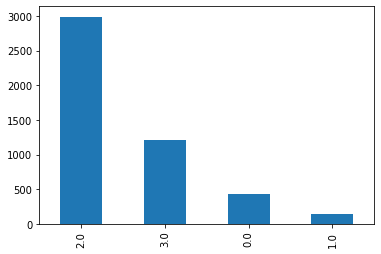

In [106]:
Sev_value_graph.plot.bar()

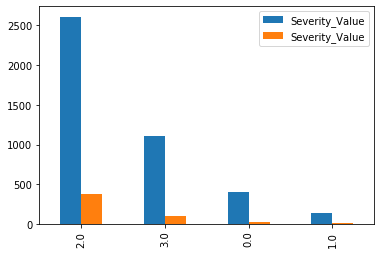

In [101]:
concat1.plot.bar()

In [99]:
concat1

,Severity_Value,Severity_Value
2.0,2609,377
3.0,1105,103
0.0,407,22
1.0,133,15
